# Timeseries_oilwell

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
import pandas as pd

df = pd.read_excel (r'/Users/avinashmataladinni/Desktop/DATA ANALYSIS-AMBEONE/Oil well.xlsx')
print (df)
df

           Date  Day  Month  Year  Volume_of_liquid_(m3/day)  \
0    2013-01-01    1      1  2013                         70   
1    2013-01-02    2      1  2013                         70   
2    2013-01-03    3      1  2013                         70   
3    2013-01-04    4      1  2013                         70   
4    2013-01-05    5      1  2013                         70   
...         ...  ...    ...   ...                        ...   
2934 2021-01-14   14      1  2021                         20   
2935 2021-01-15   15      1  2021                         20   
2936 2021-01-16   16      1  2021                         20   
2937 2021-01-17   17      1  2021                         20   
2938 2021-01-18   18      1  2021                         18   

      Oil_volume_(m3/day)  Gas_volume_(m3/day)  Water_volume_(m3/day)  \
0                      49                13055                     21   
1                      49                13055                     21   
2           

,Date,Day,Month,Year,Volume_of_liquid_(m3/day),Oil_volume_(m3/day),Gas_volume_(m3/day),Water_volume_(m3/day),Water_cut_(%),Working_hours,Dynamic_level_(m),Reservoir_pressure_(atm)
0,2013-01-01,1,1,2013,70,49,13055,21,29,24,1819,214
1,2013-01-02,2,1,2013,70,49,13055,21,29,24,1836,214
2,2013-01-03,3,1,2013,70,49,13055,21,29,24,1788,214
3,2013-01-04,4,1,2013,70,49,13055,21,29,24,1789,214
4,2013-01-05,5,1,2013,70,44,11768,26,36,24,1825,214
...,...,...,...,...,...,...,...,...,...,...,...,...
2934,2021-01-14,14,1,2021,20,6,1593,15,70,16,2101,100
2935,2021-01-15,15,1,2021,20,6,1593,15,70,16,2113,100
2936,2021-01-16,16,1,2021,20,6,1583,14,70,16,2125,100
2937,2021-01-17,17,1,2021,20,6,1573,14,70,16,2125,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       2939 non-null   datetime64[ns]
 1   Day                        2939 non-null   int64         
 2   Month                      2939 non-null   int64         
 3   Year                       2939 non-null   int64         
 4   Volume_of_liquid_(m3/day)  2939 non-null   int64         
 5   Oil_volume_(m3/day)        2939 non-null   int64         
 6   Gas_volume_(m3/day)        2939 non-null   int64         
 7   Water_volume_(m3/day)      2939 non-null   int64         
 8   Water_cut_(%)              2939 non-null   int64         
 9   Working_hours              2939 non-null   int64         
 10  Dynamic_level_(m)          2939 non-null   int64         
 11  Reservoir_pressure_(atm)   2939 non-null   int64         
dtypes: dat

In [57]:
df.describe()

,Day,Month,Year,Volume_of_liquid_(m3/day),Oil_volume_(m3/day),Gas_volume_(m3/day),Water_volume_(m3/day),Water_cut_(%),Working_hours,Dynamic_level_(m),Reservoir_pressure_(atm)
count,2939.00000000,2939.00000000,2939.00000000,2939.00000000,2939.00000000,2939.00000000,2939.00000000,2939.00000000,2939.00000000,2939.00000000,2939.00000000
mean,15.68628785,6.48962232,2016.52909153,59.46410344,17.62436203,4730.14630827,41.82885335,70.69479415,22.34467506,1930.38346376,157.01905410
std,8.79439061,3.46608746,2.31182642,18.63410141,9.68902616,2598.88852395,13.05662529,9.53420324,3.03955342,114.54375241,32.91715023
min,1.00000000,1.00000000,2013.00000000,12.00000000,0.00000000,4.00000000,9.00000000,29.00000000,7.00000000,1529.00000000,100.00000000
25%,8.00000000,3.00000000,2015.00000000,50.00000000,11.00000000,3041.50000000,33.00000000,69.00000000,22.00000000,1855.00000000,129.00000000
50%,16.00000000,7.00000000,2017.00000000,58.00000000,15.00000000,3909.00000000,43.00000000,73.00000000,24.00000000,1890.00000000,157.00000000
75%,23.00000000,10.00000000,2019.00000000,74.00000000,22.00000000,5843.50000000,50.00000000,76.00000000,24.00000000,2008.00000000,185.50000000
max,31.00000000,12.00000000,2021.00000000,113.00000000,49.00000000,13113.00000000,99.00000000,100.00000000,24.00000000,2137.00000000,214.00000000


In [6]:
df['Date'].value_counts().head()

2014-11-24    1
2020-01-07    1
2013-06-09    1
2015-09-21    1
2019-02-23    1
Name: Date, dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Date'].min(), df['Date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2021-01-18 00:00:00'))

In [9]:
df1=df.isnull().sum()
df1

Date                         0
Day                          0
Month                        0
Year                         0
Volume_of_liquid_(m3/day)    0
Oil_volume_(m3/day)          0
Gas_volume_(m3/day)          0
Water_volume_(m3/day)        0
Water_cut_(%)                0
Working_hours                0
Dynamic_level_(m)            0
Reservoir_pressure_(atm)     0
dtype: int64

In [10]:
#colsdrop = ['Volume_of_liquid_(m3/day)', 'Oil_volume_(m3/day)', 'Oil_volume_(m3/day)', 'Gas_volume_(m3/day)', 'Water_volume_(m3/day)', 'Water_cut_(%)', 'Working_hours', 'Dynamic_level_(m)']
#df=df.drop(colsdrop, axis=1, inplace=True)

#df.isnull().sum()

In [10]:
colsdrop = ['Day','Month','Year','Volume_of_liquid_(m3/day)', 'Oil_volume_(m3/day)', 'Oil_volume_(m3/day)', 'Water_volume_(m3/day)', 'Water_cut_(%)', 'Working_hours', 'Dynamic_level_(m)','Reservoir_pressure_(atm)']
df.drop(colsdrop, axis=1, inplace=True)

df.isnull().sum()

Date                   0
Gas_volume_(m3/day)    0
dtype: int64

In [11]:
df = df.groupby('Date')['Gas_volume_(m3/day)'].sum().reset_index()

In [12]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18'],
              dtype='datetime64[ns]', name='Date', length=2939, freq=None)

In [13]:
#converting to month start Mean
y = df['Gas_volume_(m3/day)'].resample('MS').mean()
y.head()
len(y)

97

In [51]:
#converting to weekly
y1 = df['Gas_volume_(m3/day)'].resample('W').sum()
y1.head()

Date
2013-01-06    75756
2013-01-13    79831
2013-01-20    83052
2013-01-27    81158
2013-02-03    84539
Freq: W-SUN, Name: Gas_volume_(m3/day), dtype: int64

In [14]:
y['2013':]

Date
2013-01-01    11824.322581
2013-02-01    12405.464286
2013-03-01    11787.612903
2013-04-01    11287.233333
2013-05-01    11172.096774
                  ...     
2020-09-01     2314.333333
2020-10-01     2109.451613
2020-11-01     1570.333333
2020-12-01     1277.064516
2021-01-01     1462.444444
Freq: MS, Name: Gas_volume_(m3/day), Length: 97, dtype: float64

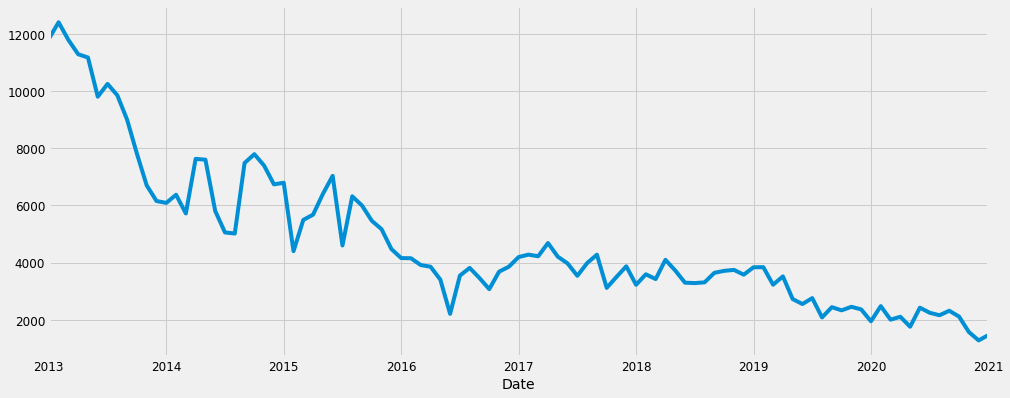

In [15]:
y.plot(figsize=(15, 6))
plt.show()

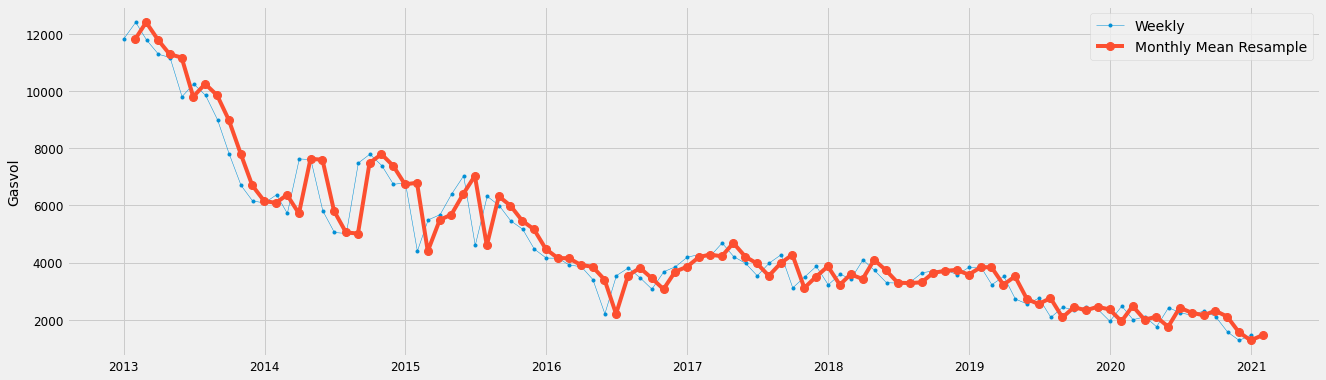

In [16]:
import warnings
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Gasvol')
ax.legend();

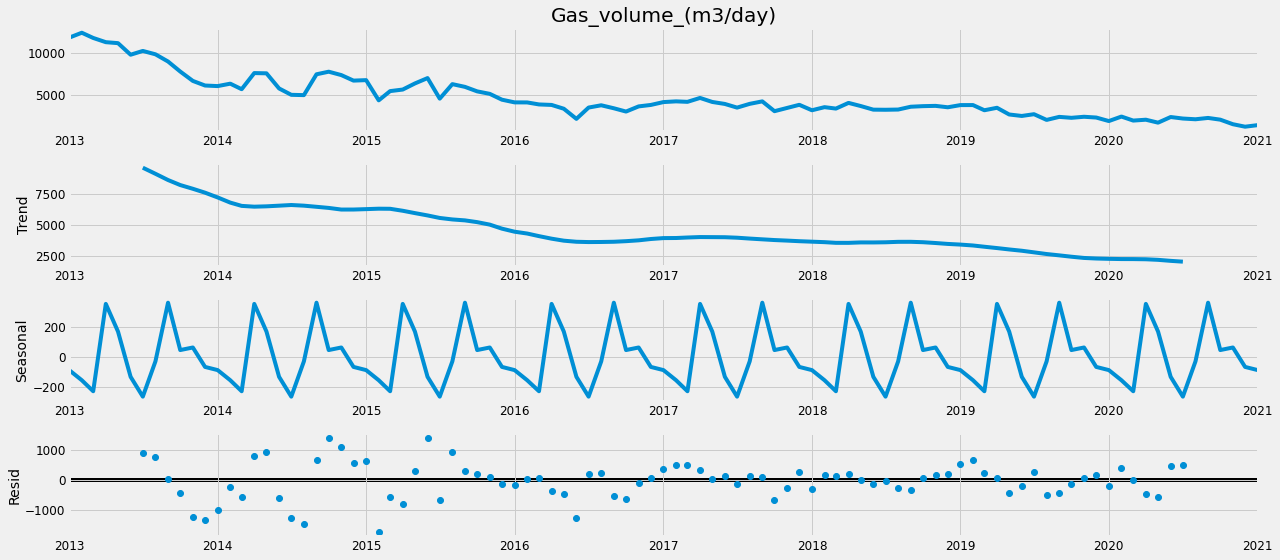

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

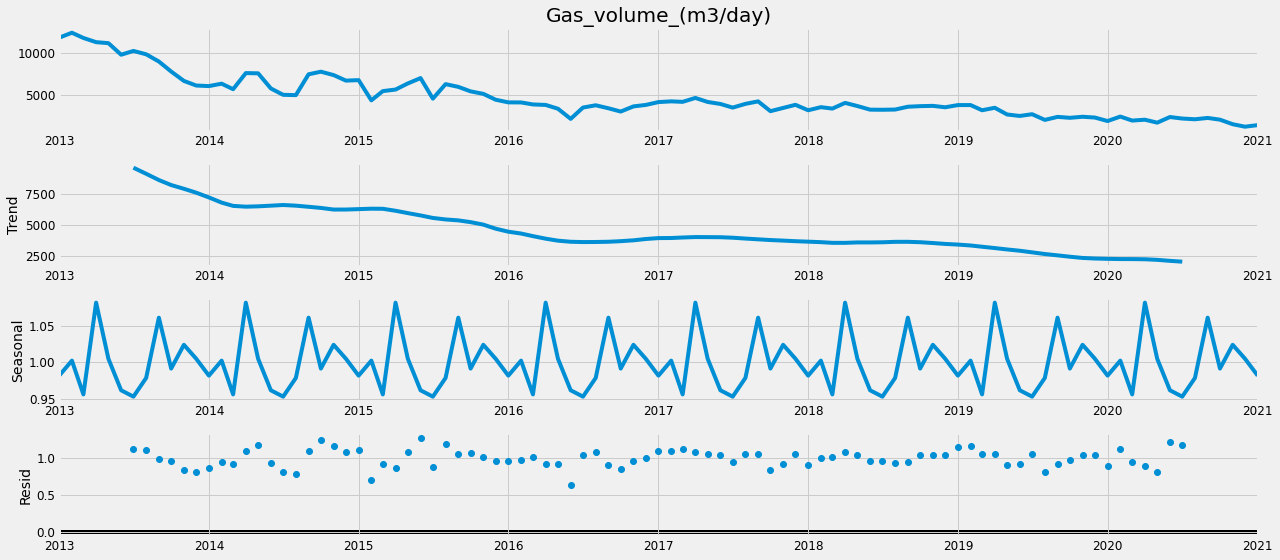

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

In [20]:
#check for stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

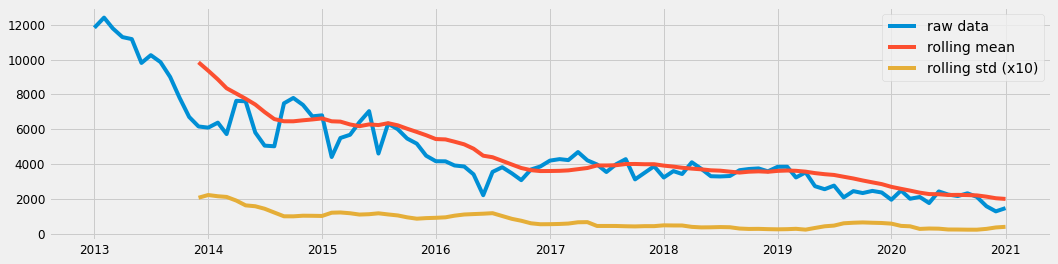

In [21]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

In [22]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [23]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -1.743
P-value = 0.409
Critical values :
	1%: -3.5087828609430614 - The data is not stationary with 99% confidence
	5%: -2.895783561573195 - The data is not stationary with 95% confidence
	10%: -2.5850381719848565 - The data is not stationary with 90% confidence


 > Is the de-trended data stationary ?
Test statistic = -5.154
P-value = 0.000
Critical values :
	1%: -3.5097356063504983 - The data is  stationary with 99% confidence
	5%: -2.8961947486260944 - The data is  stationary with 95% confidence
	10%: -2.5852576124567475 - The data is  stationary with 90% confidence


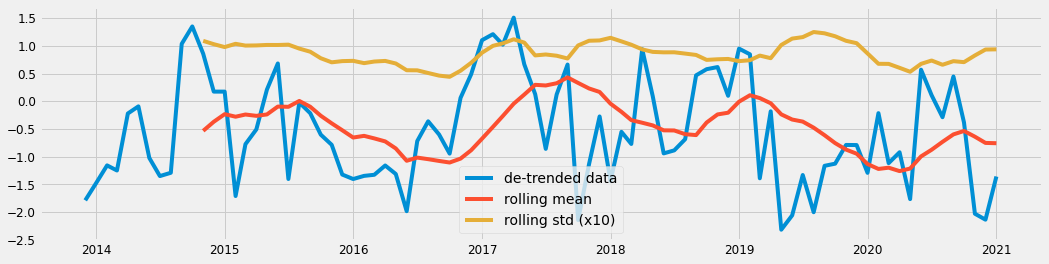

In [24]:
# Detrending
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

 > Is the 12 lag differenced data stationary ?
Test statistic = -1.845
P-value = 0.358
Critical values :
	1%: -3.524624466842421 - The data is not stationary with 99% confidence
	5%: -2.9026070739026064 - The data is not stationary with 95% confidence
	10%: -2.5886785262345677 - The data is not stationary with 90% confidence


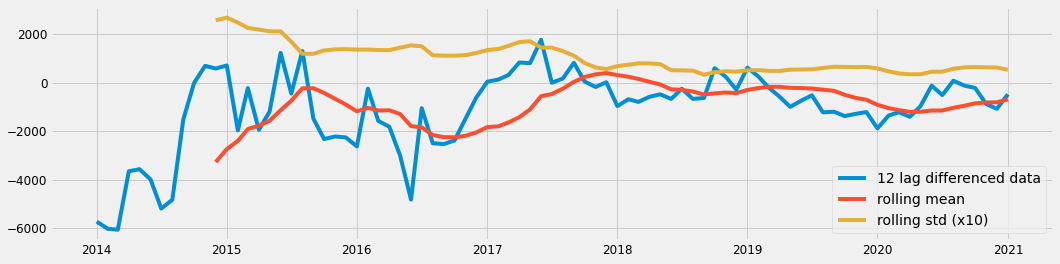

In [25]:
# Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -2.366
P-value = 0.152
Critical values :
	1%: -3.542412746661615 - The data is not stationary with 99% confidence
	5%: -2.910236235808284 - The data is not stationary with 95% confidence
	10%: -2.5927445767266866 - The data is not stationary with 90% confidence


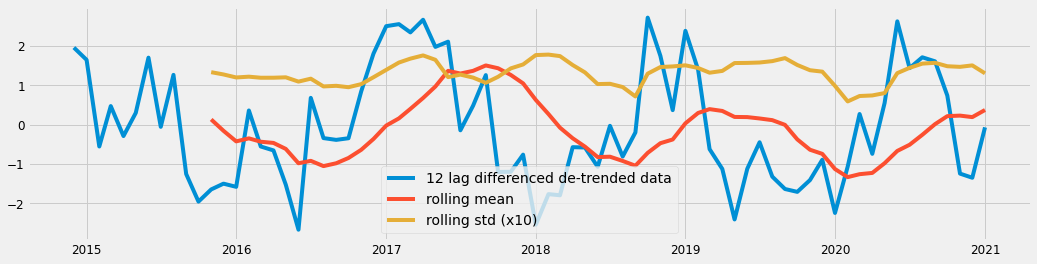

In [26]:
# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

In [27]:
len(y)

97

In [28]:
y.tail(10)

Date
2020-04-01   2103.50000000
2020-05-01   1755.09677419
2020-06-01   2421.90000000
2020-07-01   2243.32258065
2020-08-01   2156.77419355
2020-09-01   2314.33333333
2020-10-01   2109.45161290
2020-11-01   1570.33333333
2020-12-01   1277.06451613
2021-01-01   1462.44444444
Freq: MS, Name: Gas_volume_(m3/day), dtype: float64

In [29]:
y_train = y[:'2018-12-01'] # dataset to train
y_test = y['2019-01-01':] # last X months for test  
predict_steps = len(y) - len(y[:'2018-12-01']) # the number of data points for the test set
print(predict_steps)

25


In [30]:
len(y_test)

25

# creating Models

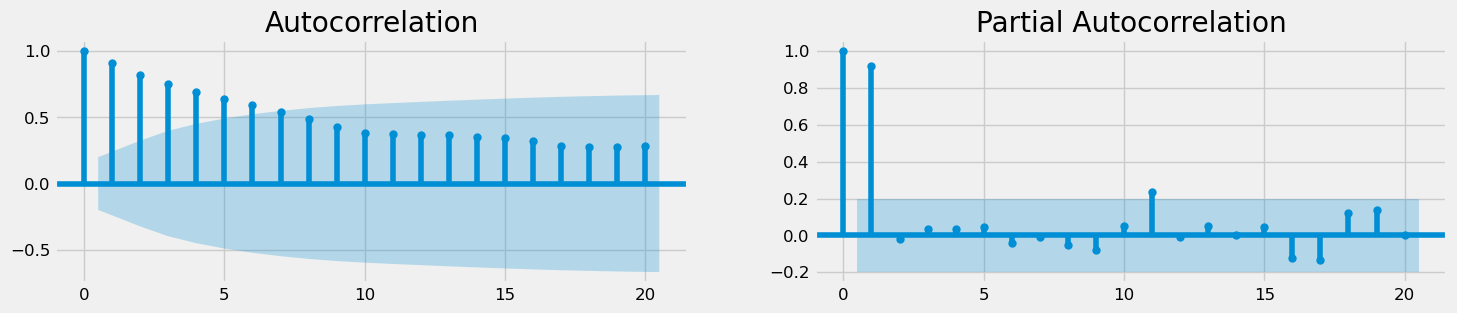

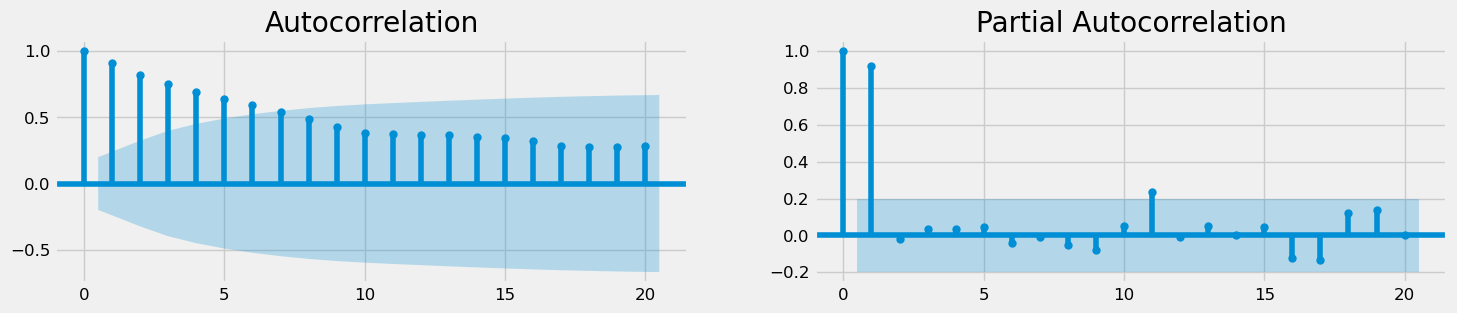

In [31]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
#acf_50 = acf(y,nlags=20)
#pacf_50 = pacf(y,nlags=20)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(y.tolist(), lags=20, ax=axes[0])
plot_pacf(y.tolist(), lags=20, ax=axes[1])



In [33]:
# SES Model-Suitable for time series data without trend or seasonal components



In [32]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_train,y_test,smoothing_level,predict_steps):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_steps).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_train).fit()
    fcast2 = fit2.forecast(predict_steps).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 1369.22
The Root Mean Squared Error of our forecasts with auto optimization is 1365.05


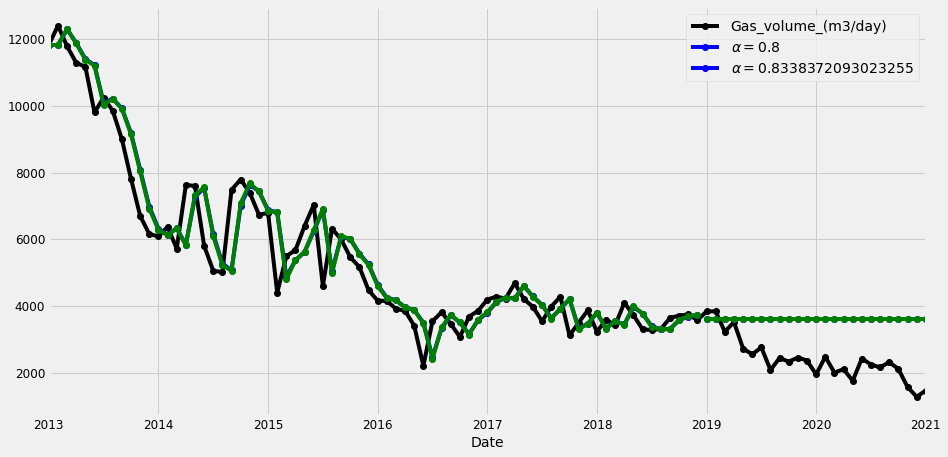

In [33]:
ses(y, y_train,y_test,0.8,predict_steps)

In [34]:
#Holt’s Linear Trend Method
#Suitable for time series data with a trend component but without a seasonal component 
from statsmodels.tsa.api import Holt

def holt(y,y_train,y_test,smoothing_level,smoothing_slope, predict_steps):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_steps).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_steps).rename("Exponential trend")
    mse2 = ((fcast2 - y_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()

The Root Mean Squared Error of Holts Linear trend 1528.73
The Root Mean Squared Error of Holts Exponential trend 1621.97


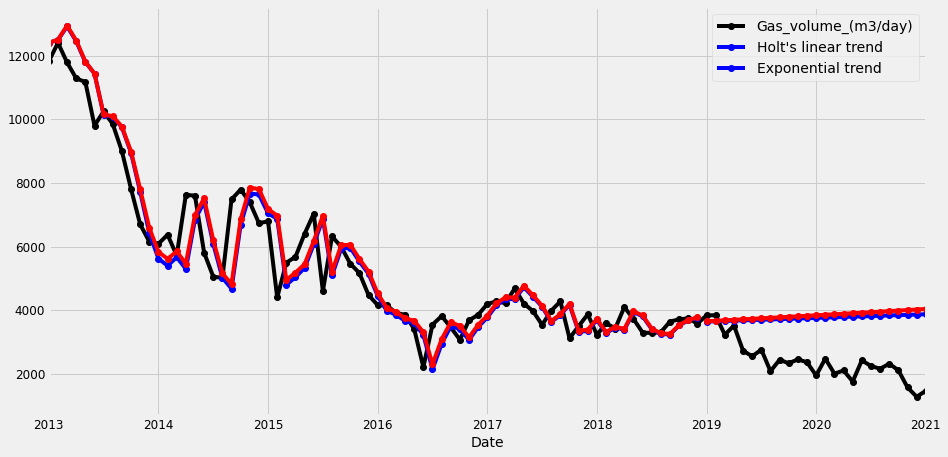

In [35]:
holt(y, y_train,y_test,0.7,0.2,predict_steps)

In [38]:
#Holt-Winters’ Seasonal Method
#Suitable for time series data with trend and/or seasonal components



In [36]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y,y_train,y_test,seasonal_type,seasonal_period,predict_steps):
    
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_steps).rename('Additive')
        mse1 = ((fcast1 - y_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit2 = ExponentialSmoothing(y_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast2 = fit2.forecast(predict_steps).rename('Additive+damped')
        mse2 = ((fcast2 - y_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fit1.fittedvalues.plot(style='--', color='red')
        fcast1.plot(style='--', marker='o', color='red', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='o', color='green', legend=True)
    
    elif seasonal_type == 'multiplicative':  
        fit3 = ExponentialSmoothing(y_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit(use_boxcox=True)
        fcast3 = fit3.forecast(predict_steps).rename('Multiplicative')
        mse3 = ((fcast3 - y_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
        fit4 = ExponentialSmoothing(y_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
        fcast4 = fit4.forecast(predict_steps).rename('Multiplicative+damped')
        mse4 = ((fcast3 - y_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fit3.fittedvalues.plot(style='--', color='red')
        fcast3.plot(style='--', marker='o', color='red', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='o', color='green', legend=True)
        
    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()

The Root Mean Squared Error of additive trend, additive seasonal of period season_length=12 and a Box-Cox transformation 1645.01
The Root Mean Squared Error of additive damped trend, additive seasonal of period season_length=12 and a Box-Cox transformation 2039.71


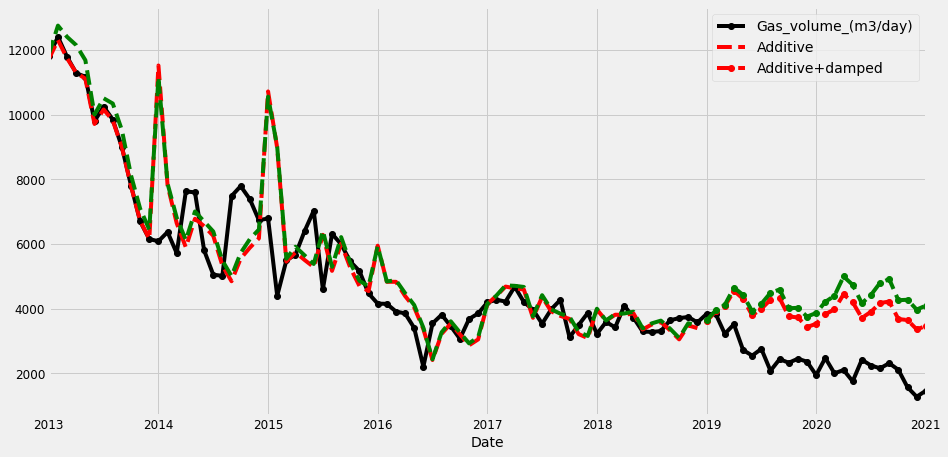

In [37]:
holt_win_sea(y, y_train,y_test,'additive',12, predict_steps)

In [41]:
#SARIMA
#Suitable for time series data with trend and/or seasonal components



In [38]:
import itertools
import warnings

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))
    
    

In [39]:
sarima_grid_search(y,12)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1919.101837652097
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1573.6013934646885
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1507.7409449721495
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1245.483179287638
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1455.2318694108196
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1399.5850569936767
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1262.1098763696045
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1247.3472571191464
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1823.802673443876
SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1468.3128903506831
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1439.1102440644802
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1197.715818008025
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1428.9936566803638
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1360.4491896333236
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1235.0013718779762
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1190.0512034345056
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1525.3479951717384
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1334.197166932829
SARIMA(0, 1, 0)

In [40]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1539      0.066     -2.331      0.020      -0.283      -0.025
ma.S.L12      -0.7809      0.160     -4.866      0.000      -1.096      -0.466
sigma2      6.208e+05   1.04e+05      5.950      0.000    4.16e+05    8.25e+05


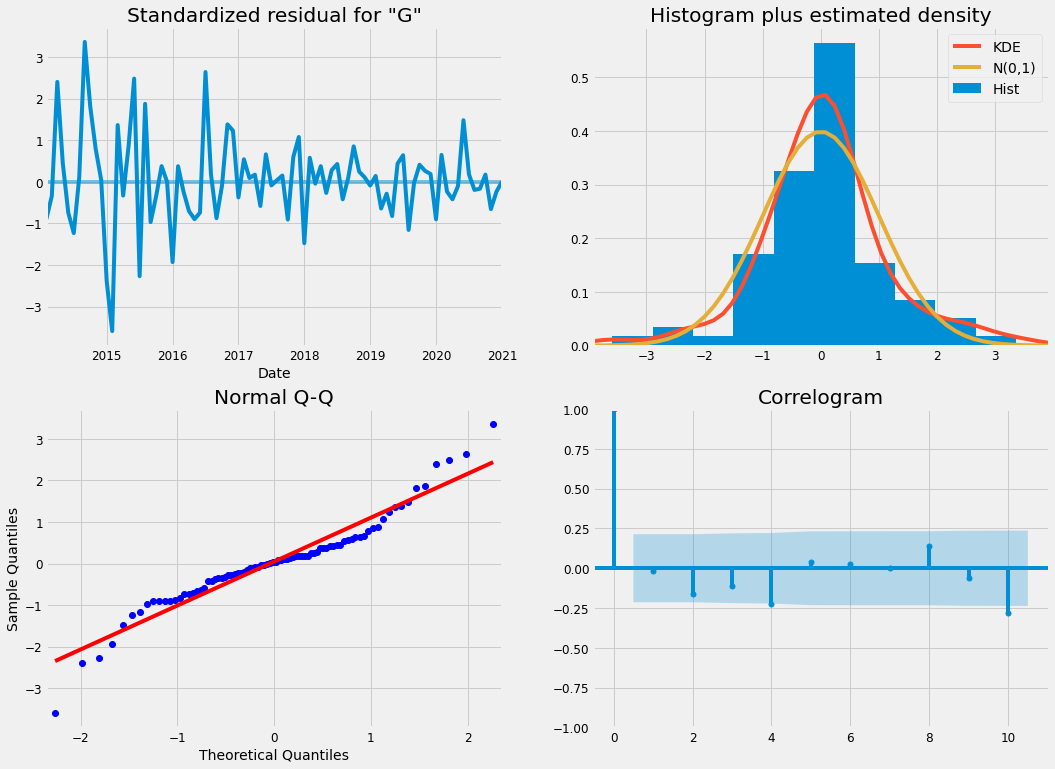

In [41]:
results.plot_diagnostics(figsize=(16, 12))
plt.show()

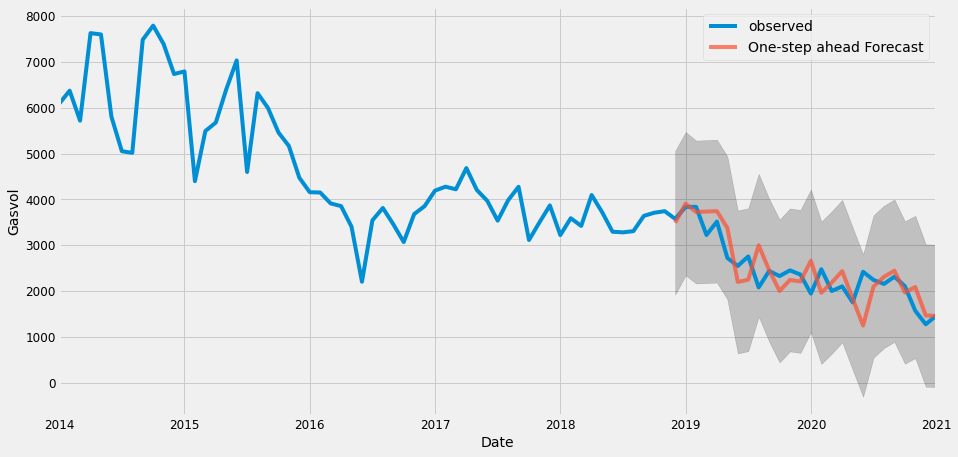

The Mean Squared Error of our forecasts is 193953.58
The Root Mean Squared Error of our forecasts is 440.4


In [47]:
pred = results.get_prediction(start=pd.to_datetime('2018-12-01'), dynamic=False)
# The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Gasvol')
plt.legend()
plt.show()

y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_test) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

####

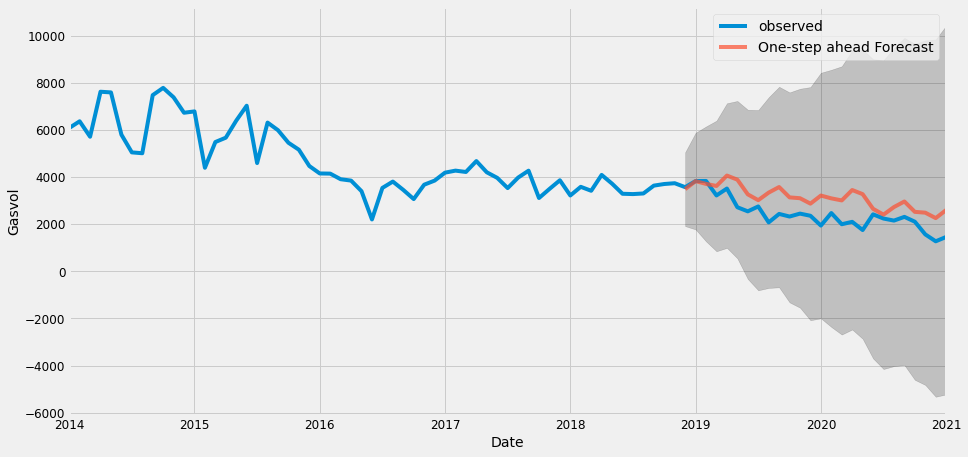

The Mean Squared Error of our forecasts is 720882.41
The Root Mean Squared Error of our forecasts is 849.05


In [46]:
# A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.

pred1 = results.get_prediction(start=pd.to_datetime('2018-12-01'), dynamic=True)
pred1_ci = pred1.conf_int()
ax = y['2014':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred1_ci.index,
                pred1_ci.iloc[:, 0],
                pred1_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Gasvol')
plt.legend()
plt.show()

y_forecasted1 = pred1.predicted_mean
mse1 = ((y_forecasted1 - y_test) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse1, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse1), 2)))

####

# Forecasting

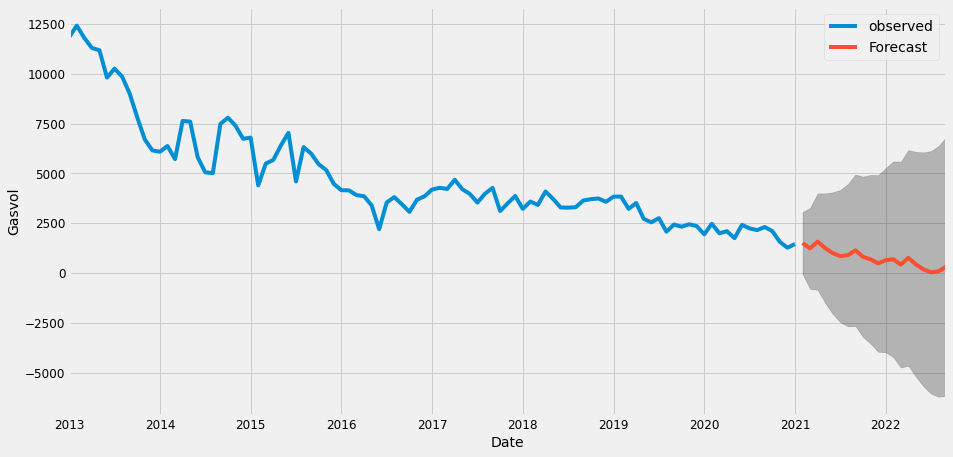

In [45]:
pred_uc = results.get_forecast(steps=20,dynamic=True)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Gasvol')
plt.legend()
plt.show()

In [48]:
pm = pred_uc.predicted_mean.reset_index()
pm.columns = ['Date','Predicted_Mean']
print(pm)  

         Date  Predicted_Mean
0  2021-02-01   1511.97190867
1  2021-03-01   1242.16015498
2  2021-04-01   1579.18955576
3  2021-05-01   1253.98670701
4  2021-06-01   1004.31589131
5  2021-07-01    854.91485901
6  2021-08-01    904.31582111
7  2021-09-01   1145.07452175
8  2021-10-01    817.66376051
9  2021-11-01    696.74350622
10 2021-12-01    488.95015410
11 2022-01-01    649.62865254
12 2022-02-01    699.46916394
13 2022-03-01    429.65741026
14 2022-04-01    766.68681104
15 2022-05-01    441.48396229
16 2022-06-01    191.81314659
17 2022-07-01     42.41211429
18 2022-08-01     91.81307639
19 2022-09-01    332.57177703


In [49]:
pci = pred_ci.reset_index()
pci.columns = ['Date','Lower Bound','Upper Bound']
print(pci)

         Date   Lower Bound   Upper Bound
0  2018-12-01 1922.79583101 5057.27299473
1  2019-01-01 2342.83482300 5470.27504579
2  2019-02-01 2168.19809508 5284.35362928
3  2019-03-01 2176.55040453 5292.41568182
4  2019-04-01 2186.15216713 5302.01033963
5  2019-05-01 1819.09487474 4934.95287685
6  2019-06-01  641.68205152 3757.54004958
7  2019-07-01  690.69107204 3806.54907000
8  2019-08-01 1442.38038449 4558.23838244
9  2019-09-01  900.48472253 4016.34272048
10 2019-10-01  444.45381497 3560.31181292
11 2019-11-01  685.51559881 3801.37359259
12 2019-12-01  652.87383660 3768.64558932
13 2020-01-01 1105.54703951 4217.23176906
14 2020-02-01  411.22923048 3516.29435512
15 2020-03-01  635.40976027 3740.30459541
16 2020-04-01  884.13840432 3989.02907469
17 2020-05-01  283.72119561 3388.61176614
18 2020-06-01 -304.15842237 2800.73214578
19 2020-07-01  548.06762557 3652.95819366
20 2020-08-01  758.31572032 3863.20628841
21 2020-09-01  893.23827534 3998.12884343
22 2020-10-01  418.74120276 3523.6

In [50]:
finaltable = pm.join(pci.set_index('Date'), on='Date')
print(finaltable)

         Date  Predicted_Mean  Lower Bound  Upper Bound
0  2021-02-01   1511.97190867          NaN          NaN
1  2021-03-01   1242.16015498          NaN          NaN
2  2021-04-01   1579.18955576          NaN          NaN
3  2021-05-01   1253.98670701          NaN          NaN
4  2021-06-01   1004.31589131          NaN          NaN
5  2021-07-01    854.91485901          NaN          NaN
6  2021-08-01    904.31582111          NaN          NaN
7  2021-09-01   1145.07452175          NaN          NaN
8  2021-10-01    817.66376051          NaN          NaN
9  2021-11-01    696.74350622          NaN          NaN
10 2021-12-01    488.95015410          NaN          NaN
11 2022-01-01    649.62865254          NaN          NaN
12 2022-02-01    699.46916394          NaN          NaN
13 2022-03-01    429.65741026          NaN          NaN
14 2022-04-01    766.68681104          NaN          NaN
15 2022-05-01    441.48396229          NaN          NaN
16 2022-06-01    191.81314659          NaN      